## Лабораторная работа №1

Поправил run.sh файл:

In [ ]:
#for n in `seq $1 $2 $3`
#do
#    echo "n=" $n
#    ./cache $n
#done

Создал launch.sh файл, который запускает run.sh скрипт два раза: <br /> a) для матриц размером [1000; 1100] с шагом 1<br /> b) для матриц размером [1000; 2000] с шагом 10

In [ ]:
#./run.sh 1000 1 1100 2>1100.txt
#./run.sh 1000 10 2000 2>2000.txt

В результате я получил два файла с результатами (временем выполнения) перемножения матриц: 1100.txt и 2000.txt соответственно. Распарсил результаты и с помощью модуля matplotlib вывел их в виде графиков. 

In [63]:
def read_log_file (path):
    results = dict()
    for line in open(path):
        if 'n = ' in line:
            n = int(line.split("=")[1])
        elif 'time' in line:
            method = line.split(":")[0][4:]
            value = float(line.split(":")[1])
            results[method] = results.get(method, list())
            pair = (n, value)
            results[method].append(pair)
    return results

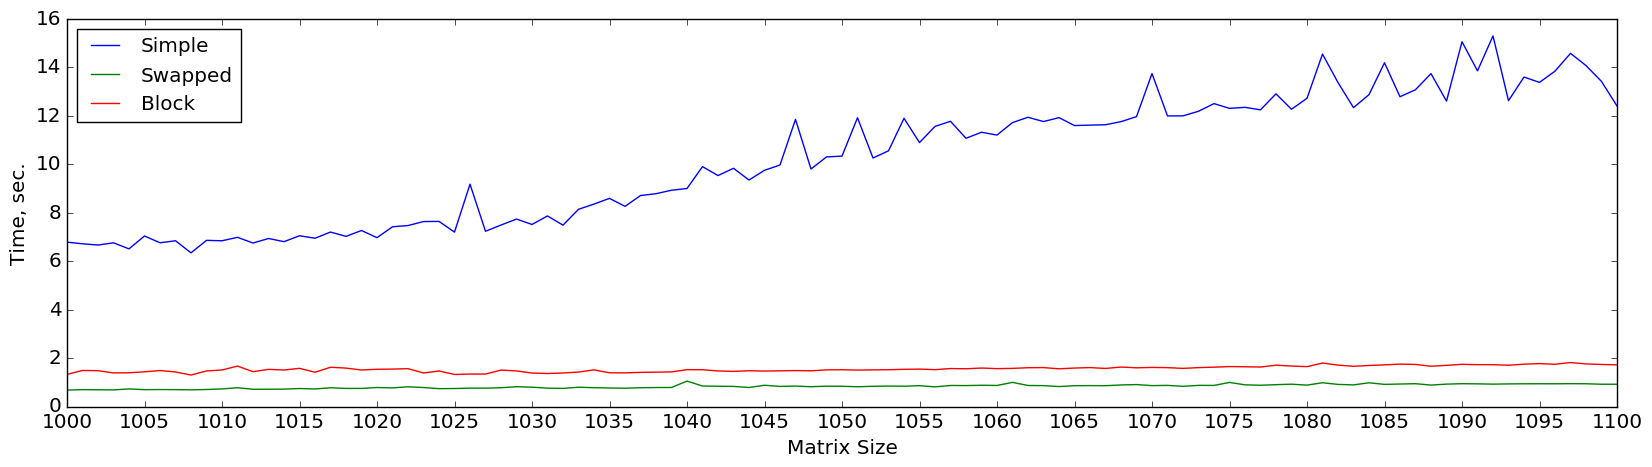

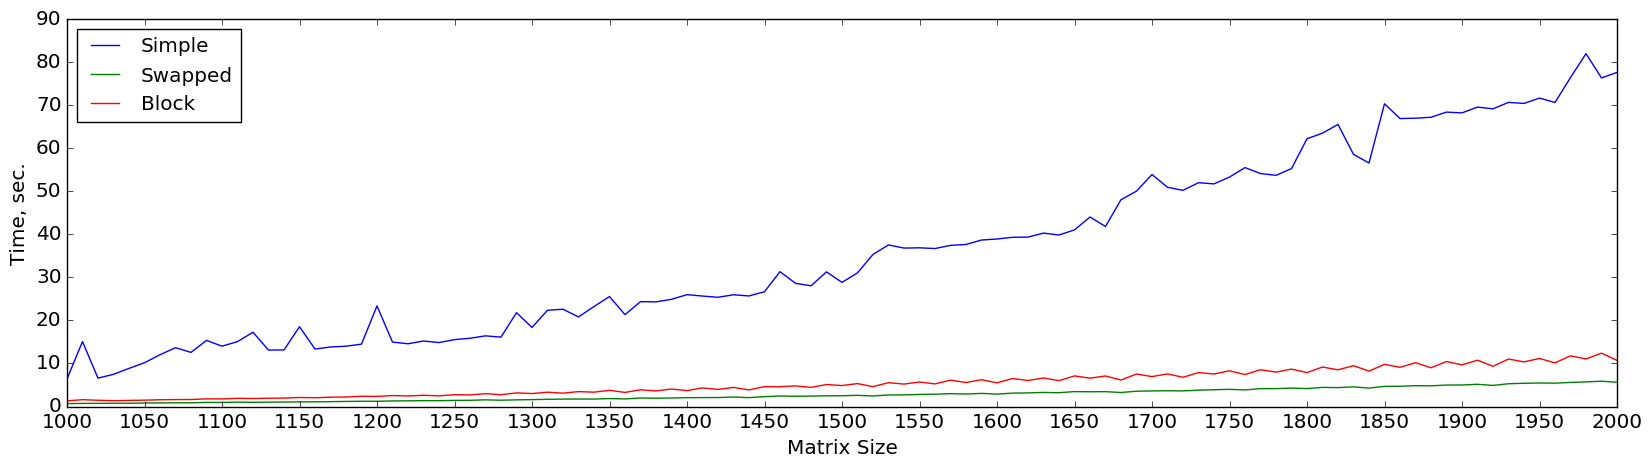

In [66]:
import matplotlib.pyplot as plt
import numpy as nm

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

def plot_results(results):
    methods = results.keys()

    for method in methods:
        plt.plot([row[0] for row in results[method]], [row[1] for row in results[method]], label=method)
        plt.legend(loc=2)
        plt.xticks(nm.arange(results[method][0][0], results[method][-1][0] + 1, (results[method][-1][0] - results[method][0][0])/20))
        plt.xlabel('Matrix Size')
        plt.ylabel('Time, sec.')
    plt.show()

results1100 = read_log_file("1100.txt")
results2000 = read_log_file("2000.txt")

plot_results(results1100)
plot_results(results2000)



#### Характеристики виртуальной машины:
ОС: Linux Ubuntu 16.04.1 (64-bit) <br /> CPU: Intel Core i5 3470, 3.20 GHz <br /> Cashes: L1D 32Kb (8-way, 64 byte blocks), L1I 32Kb (8-way, 64 byte blocks), L2 256Kb (8-way, 64 byte blocks), L3 6Mb (12-way, 64 byte blocks) <br /> RAM: 8Gb DDR3

#### Анализ графиков:
Из представленных выше графиков интересно отметить следующее: на некотрых отрезках (на 1ом графике при размерах от 1010 до 1025 и на 2ом графике от 1525 до 1675) время выполнения практически не растет, а в некоторых других местах, в свою очередь, отчетливо видны "всплески" времени выполнения. На мой взгляд, объяснением этому является интеллектуальная стратегия упреждающей спекулятивной загрузки данных в кэш. Другими словами, на тех участках, где кэш "угадывал" наперед, какие данные нужно загрузить, мы видим отсутствие увеличения времени выполнения - это cache hit. И соотвественно, те учатски, на которых мы видим "всплески", означают, что кэш "не угадал" и тут же произошел cache miss. <br /> Из этого можно сделать вывод, что правильный/быстрый алгоритм играет огромную роль в конечной произвоительности и скорости выполнения программы.